In [153]:
import seaborn as sns
import numpy as np
import pandas as pd
import statistics as st 
import matplotlib.pyplot as plt
import sklearn.model_selection as sk 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import linear_model
df=pd.read_csv(r"C:\Users\Sara\Downloads\drug200.csv")

In [155]:
#understand data
print(df.describe())
print(df.info())
#no columns with missing data

              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [159]:
print(df.columns)

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


Age


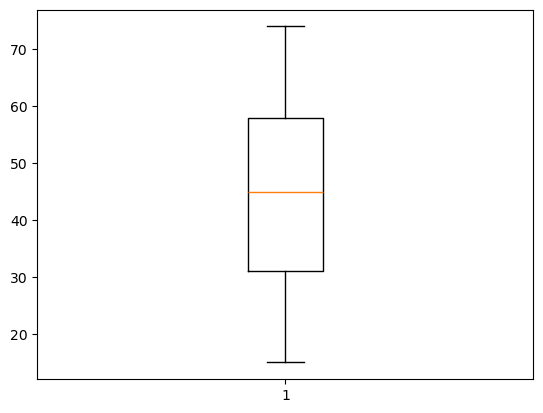

Na_to_K


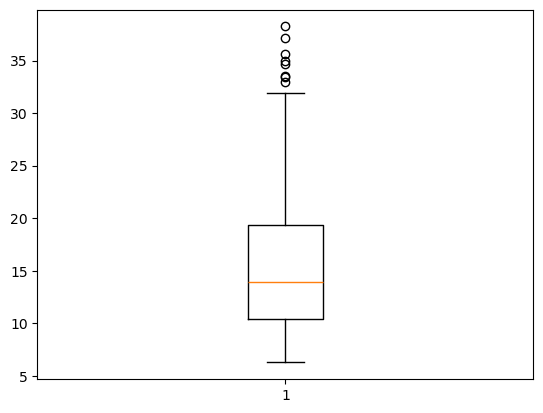

In [161]:
n_df= ["Age","Na_to_K"]
for j in n_df:
    print(j)
    plt.boxplot(df[j])
    plt.show()
#acceptable outliers
def robust_Scaling(p):
    lis=list(p)
    q1 = np.quantile(lis, 0.10)
    q3 = np.quantile(lis, 0.90)
    med = np.median(lis)
    iqr = q3-q1
    p=(p-med)/iqr
    return p
for c in n_df:
    df[c]=normalize(df[c])

In [163]:
data= df.select_dtypes(exclude='number')
for i in data:
    print(i)
    print(len(data[i].unique()))
    print(data[i].unique())

Sex
2
['F' 'M']
BP
3
['HIGH' 'LOW' 'NORMAL']
Cholesterol
2
['HIGH' 'NORMAL']
Drug
5
['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [165]:
df["Sex"].loc[df["Sex"]=="F"]=0
df["Sex"].loc[df["Sex"]=="M"]=1
df["BP"].loc[df["BP"]=="LOW"]=0
df["BP"].loc[df["BP"]=="NORMAL"]=1
df["BP"].loc[df["BP"]=="HIGH"]=2
df["Cholesterol"].loc[df["Cholesterol"]=="NORMAL"]=0
df["Cholesterol"].loc[df["Cholesterol"]=="HIGH"]=1
df["Sex"]=df["Sex"].astype('int64')
df["BP"]=df["BP"].astype('float64')
df["Cholesterol"]=df["Cholesterol"].astype('int64')
l=list(df["Drug"].unique())
for z in l:
    n=list(df["Drug"]==z)
    for i in range(len(n)):
        if n[i]==True:
            n[i]=1
        else:
            n[i]=0
    df.loc[:, z] = n
df.drop(columns="Drug",inplace=True)

C:\Users\Sara\AppData\Local\Temp\ipykernel_16556\1909476770.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Sex"].loc[df["Sex"]=="F"]=0
C:\Users\Sara\AppData\Local\Temp\ipykernel_16556\1909476770.py:1: SettingWithCopyWarning: 
A valu

In [167]:
print(df)

          Age  Sex   BP  Cholesterol   Na_to_K  DrugY  drugC  drugX  drugA  \
0    0.135593    0  2.0            1  0.596848      1      0      0      0   
1    0.542373    1  0.0            1  0.213397      0      1      0      0   
2    0.542373    1  0.0            1  0.120239      0      1      0      0   
3    0.220339    0  1.0            1  0.047814      0      0      1      0   
4    0.779661    0  0.0            1  0.368191      1      0      0      0   
..        ...  ...  ...          ...       ...    ...    ...    ...    ...   
195  0.694915    0  0.0            1  0.165676      0      1      0      0   
196  0.016949    1  0.0            1  0.179405      0      1      0      0   
197  0.627119    1  1.0            1  0.113359      0      0      1      0   
198  0.135593    1  1.0            0  0.242385      0      0      1      0   
199  0.423729    0  0.0            0  0.158859      0      0      1      0   

     drugB  
0        0  
1        0  
2        0  
3        0 

In [169]:
print(df.corr()["Cholesterol"])

Age            0.068234
Sex            0.008811
BP            -0.032208
Cholesterol    1.000000
Na_to_K       -0.010000
DrugY          0.002712
drugC          0.286166
drugX         -0.175996
drugA          0.004861
drugB         -0.008851
Name: Cholesterol, dtype: float64


In [171]:
x=df.drop(columns=["Cholesterol"])
y=df["Cholesterol"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Model Accuracy: ",accuracy_score(y_test,y_pred)*100,"%")

Model Accuracy:  50.0 %
